# Exploratory Data Analysis Basics

This notebook demonstrates fundamental techniques for exploratory data analysis.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Loading and Examining Data

We'll load a sample dataset from seaborn to demonstrate EDA techniques.

In [4]:
# Load a sample dataset
tips = sns.load_dataset('tips')

# Display the first few rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Get basic information about the dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
# Summary statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Data Visualization

### Univariate Analysis

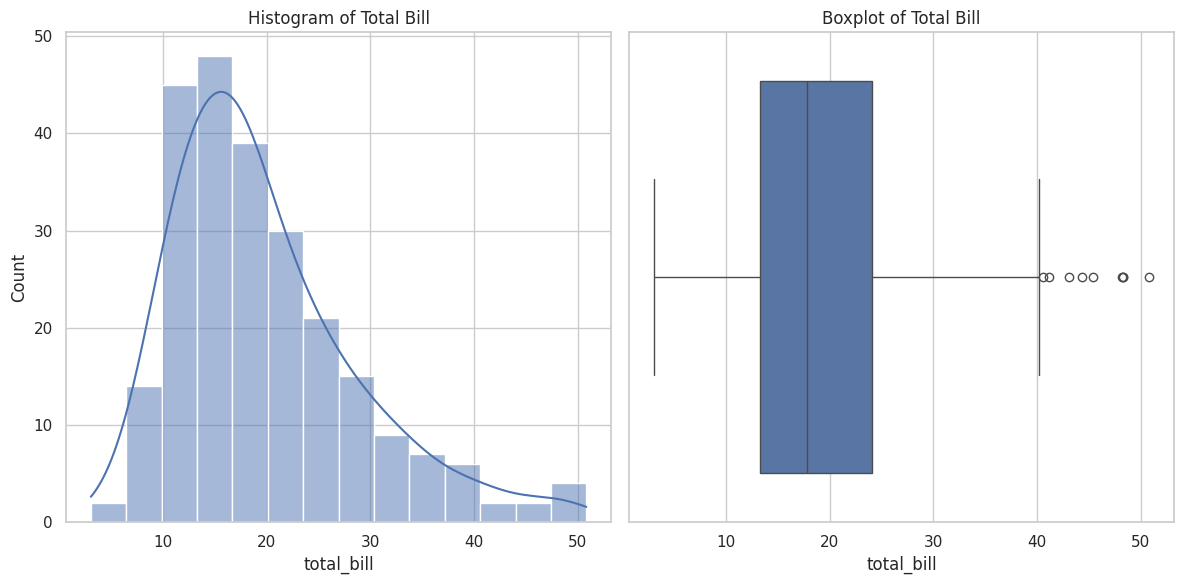

In [7]:
# Distribution of total bill
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.subplot(1, 2, 2)
sns.boxplot(x=tips['total_bill'])
plt.title('Boxplot of Total Bill')

plt.tight_layout()
plt.show()

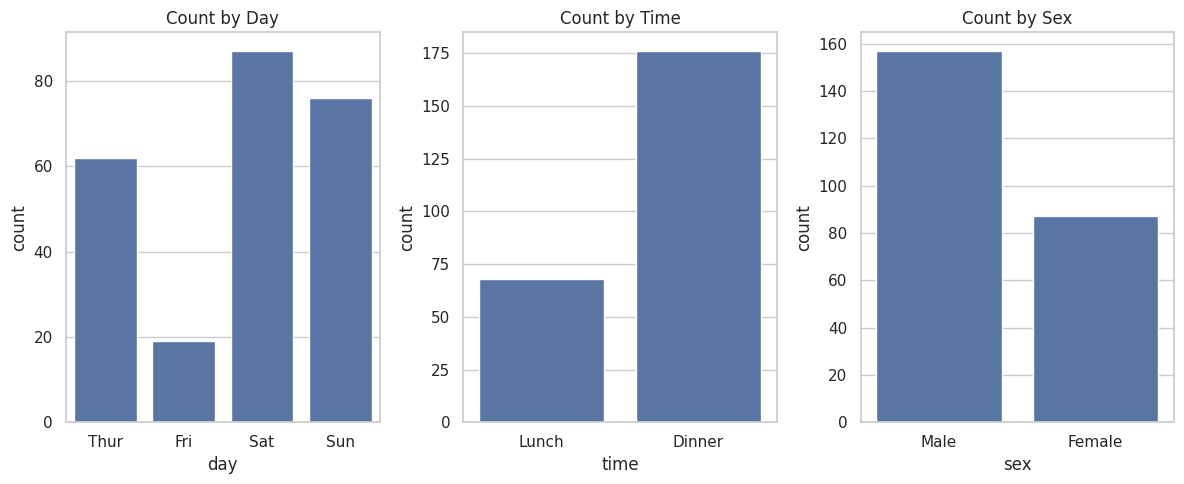

In [8]:
# Count plot for categorical variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='day', data=tips)
plt.title('Count by Day')

plt.subplot(1, 3, 2)
sns.countplot(x='time', data=tips)
plt.title('Count by Time')

plt.subplot(1, 3, 3)
sns.countplot(x='sex', data=tips)
plt.title('Count by Sex')

plt.tight_layout()
plt.show()

### Bivariate Analysis

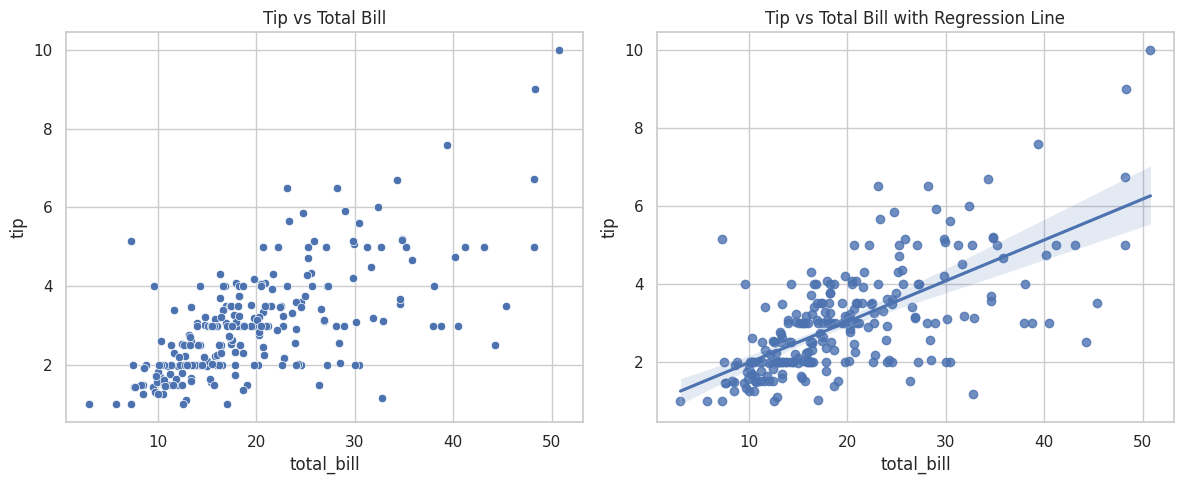

In [9]:
# Relationship between total bill and tip
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Tip vs Total Bill')

plt.subplot(1, 2, 2)
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Tip vs Total Bill with Regression Line')

plt.tight_layout()
plt.show()

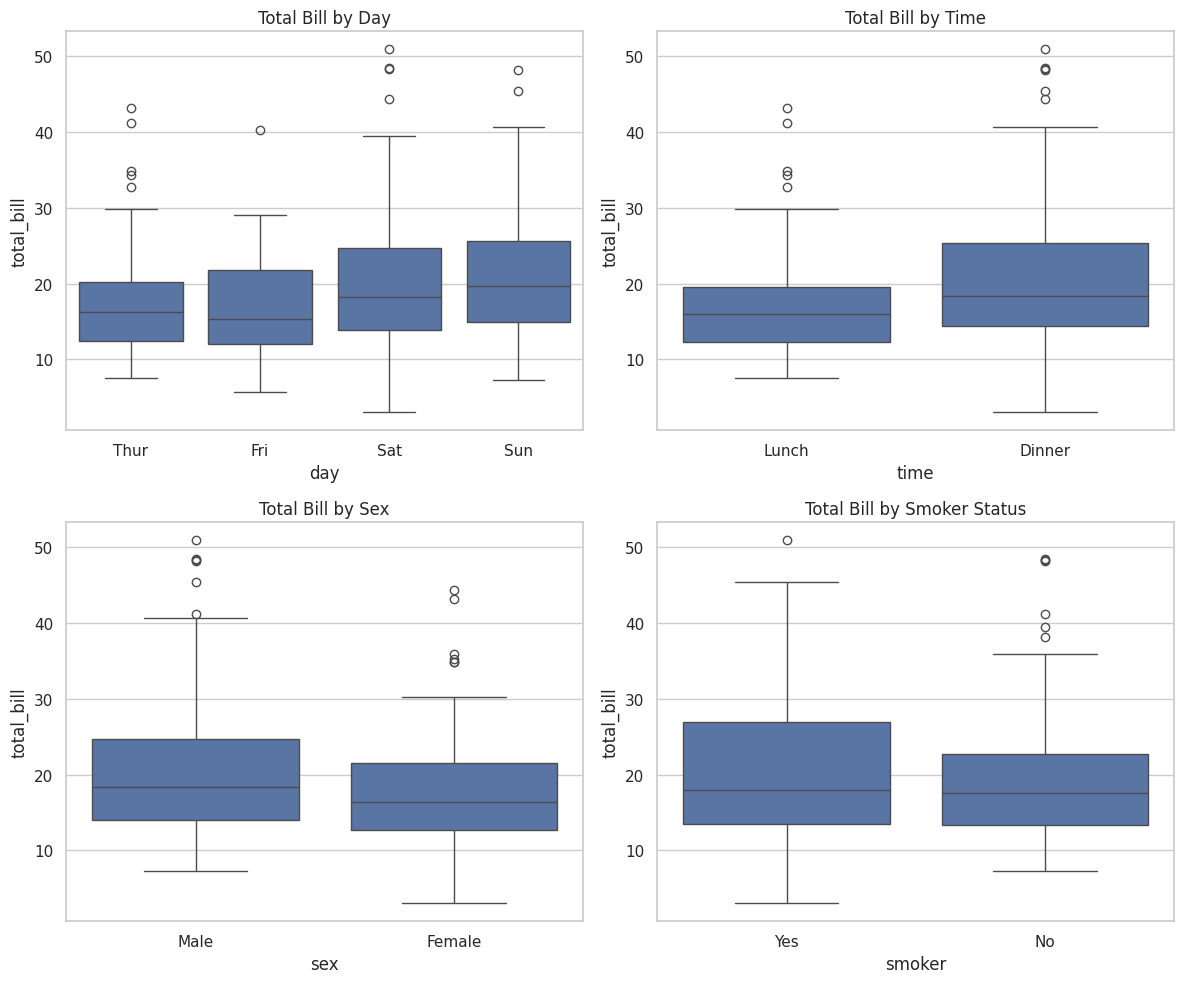

In [10]:
# Boxplots of total bill by various categories
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Total Bill by Day')

plt.subplot(2, 2, 2)
sns.boxplot(x='time', y='total_bill', data=tips)
plt.title('Total Bill by Time')

plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='total_bill', data=tips)
plt.title('Total Bill by Sex')

plt.subplot(2, 2, 4)
sns.boxplot(x='smoker', y='total_bill', data=tips)
plt.title('Total Bill by Smoker Status')

plt.tight_layout()
plt.show()

### Multivariate Analysis

In [ ]:
# Creating a correlation matrix
numeric_tips = tips.select_dtypes(include=[np.number])
corr = numeric_tips.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pairplot for all numeric variables
sns.pairplot(tips, hue='time')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

In [ ]:
# Advanced visualization - facetgrid
g = sns.FacetGrid(tips, col="sex", row="smoker", height=4)
g.map(sns.scatterplot, "total_bill", "tip")
g.add_legend()
plt.show()

## Statistical Analysis

In [ ]:
# Group by analysis
tips.groupby('day')['total_bill'].agg(['count', 'mean', 'std', 'min', 'max'])

In [ ]:
# Pivot table
pd.pivot_table(tips, index='day', columns='time', values='total_bill', aggfunc='mean')

## Conclusion

This notebook has demonstrated various EDA techniques including:
- Data overview and summary statistics
- Univariate analysis with histograms and boxplots
- Bivariate analysis with scatter plots and categorical comparisons
- Multivariate analysis with correlation matrices and pair plots
- Statistical summaries with groupby and pivot tables

These techniques help in understanding the data patterns, relationships, and potential insights.